# **OpenAI**


In [1]:
import openai

OPENAI_API_KEY = open("/home/plsek/Documents/Keys/openai.txt").read().strip("\n")
openai.api_key = OPENAI_API_KEY

In [ ]:
question = input(">")

completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":question}]
)

reply_content = completion.choices[0].message.content

print()
print(reply_content)
print()

In [44]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":"Generate python code that generates 1000 random numbers and plots a histogram."}]
)

reply_content = completion.choices[0].message.content

print(reply_content)

Here's an example code to generate 1000 random numbers and plot a histogram using Python:

```python
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers
random_numbers = [random.randint(0, 100) for i in range(1000)]

# Plot histogram
plt.hist(random_numbers, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of 1000 Random Numbers')
plt.show()
```

Explanation:

- First, we import the `random` module and `matplotlib.pyplot` module. 
- We then generate a list of 1000 random integers between 0 and 100 using a list comprehension and the `randint()` function from the `random` module.
- Finally, we plot a histogram of the generated numbers using the `hist()` function from `matplotlib`. The `bins` parameter specifies the number of bins on the x-axis, and the `xlabel`, `ylabel`, and `title` functions add labels to the plot. The `show()` function displays the plot.


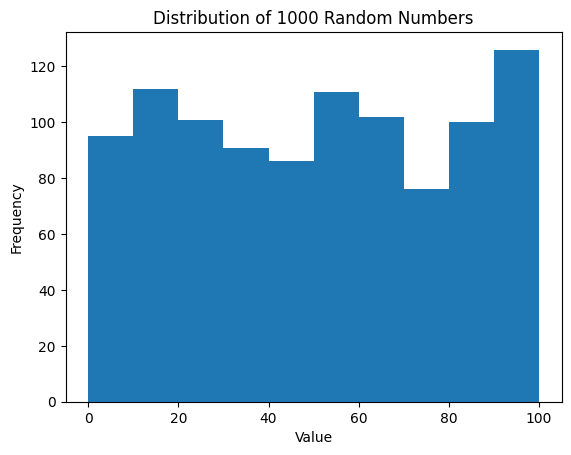

In [45]:
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers
random_numbers = [random.randint(0, 100) for i in range(1000)]

# Plot histogram
plt.hist(random_numbers, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of 1000 Random Numbers')
plt.show()

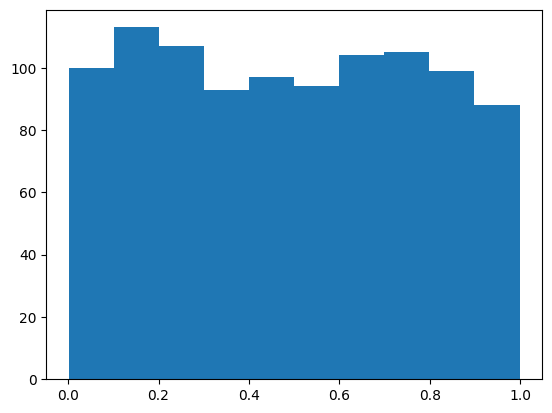

In [46]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":"Generate python code that generates 1000 random numbers and plots a histogram. Print only the code."}]
)

reply_content = completion.choices[0].message.content

for s in ["```", "```python"]:
    reply_content = reply_content.strip(s)

exec(reply_content)

## **DALL-E**

In [34]:
response = openai.Image.create(
  prompt="Two coliding spiral galaxies",
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']

image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-Nqe44yrsRozhWHqkp9GacRfV/user-C4hiVzzby68nsYBv9sr6Bvcq/img-wklTVyP3M2MFlQfUwooPM46Y.png?st=2023-04-18T16%3A42%3A54Z&se=2023-04-18T18%3A42%3A54Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-04-18T15%3A18%3A31Z&ske=2023-04-19T15%3A18%3A31Z&sks=b&skv=2021-08-06&sig=81xs28o1znd/drlePGqfyh%2BbnVGuQIv37dhZdWdA1w8%3D'

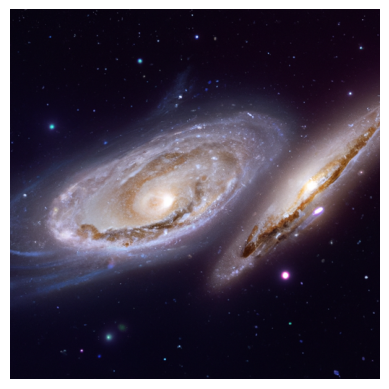

In [36]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off')
plt.show()

## **Whisper**

In [1]:
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source) #, timeout=5)
    # audio = r.record(source, duration=3)

ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.front
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround21
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround21
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround40
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround41
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround50
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround51
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround71
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.iec958
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.iec958
ALSA lib pcm.c:2666:(snd

Say something!


In [5]:
question = r.recognize_whisper_api(audio, api_key=OPENAI_API_KEY)
# question = r.recognize_whisper(audio, language="english")

print(question)

What's the distance of NGC 4649?


In [6]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":question}]
)

reply_content = completion.choices[0].message.content.strip("\n")

print(reply_content)

NGC 4649 (also known as M60) is a galaxy that is located about 55 million light-years away from Earth.


In [7]:
import os
from gtts import gTTS

audio = gTTS(text=reply_content, lang="en", slow=False)
audio.save("reply.mp3")
_ = os.system("cvlc --rate 1.3 --play-and-exit reply.mp3")
os.system("rm reply.mp3")

[00005648f394d6d0] dummy interface: using the dummy interface module...
[00005648f3907ea0] main playlist: end of playlist, exiting


0